# Decision Trees and Ensemble Learning

This notebook covers:
- Decision Tree Training
- Visualization of a Decision Tree
- Voting Classifier
- Bagging and Boosting
- Random Forests

Dataset: Titanic (classification task)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# Load dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])

features = ['Pclass', 'Sex', 'Age', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3832\3967800688.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_3832\3967800688.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

## Train and Visualize a Decision Tree

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       105
           1       0.84      0.64      0.72        74

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.80      0.80      0.79       179



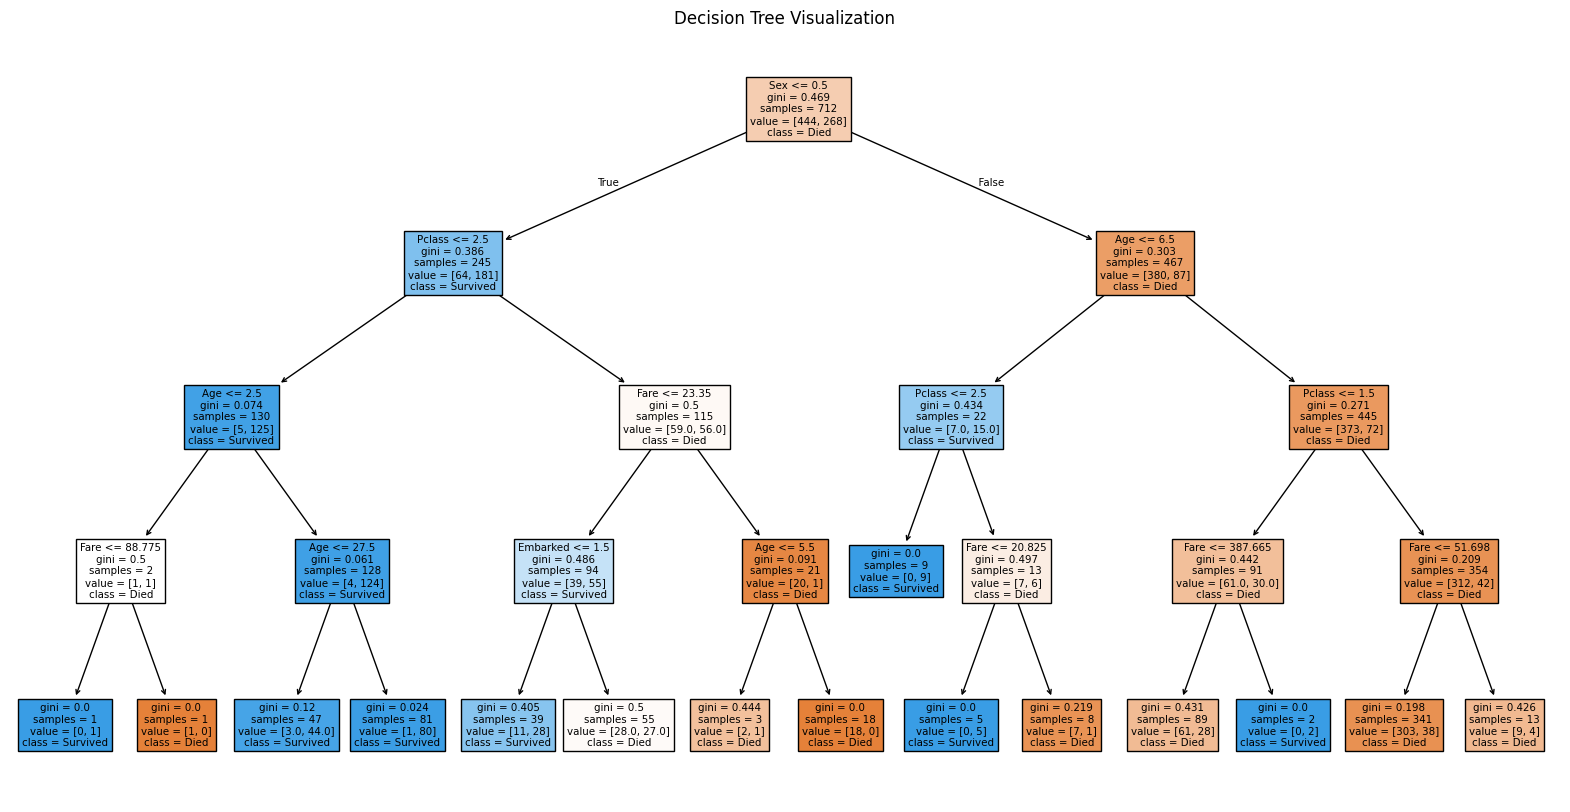

In [2]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)

print(classification_report(y_test, y_pred_tree))
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=features, class_names=['Died', 'Survived'], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

## Hard Voting Classifier

In [3]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('svc', SVC(probability=True)),
    ('dt', DecisionTreeClassifier())
], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print(classification_report(y_test, y_pred_vote))

              precision    recall  f1-score   support

           0       0.79      0.89      0.83       105
           1       0.80      0.66      0.73        74

    accuracy                           0.79       179
   macro avg       0.80      0.77      0.78       179
weighted avg       0.79      0.79      0.79       179



## Random Forest

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       105
           1       0.75      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



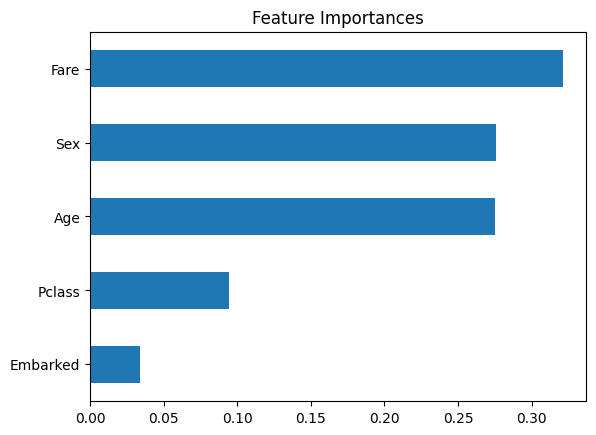

In [4]:
forest = RandomForestClassifier(n_estimators=100, random_state=42)
forest.fit(X_train, y_train)
y_pred_forest = forest.predict(X_test)
print(classification_report(y_test, y_pred_forest))

importances = pd.Series(forest.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importances")
plt.show()


## Exercises

### 1. Try Different Depths for the Decision Tree
Try `max_depth` values of 2, 4, 6, and 10. What depth gives the best generalization?

```python
# Example:
for depth in [2, 4, 6, 10]:
...
```

---

### 2. Try Soft Voting Instead of Hard Voting
Change the `VotingClassifier` to use `voting='soft'` and compare accuracy.

---

### 3. Tune the Random Forest with GridSearchCV
Use `GridSearchCV` to find the best number of trees and max depth.

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [4, 6, None]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
```


In [5]:
## Exo 1

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Tester différentes profondeurs
for depth in [2, 4, 6, 10]:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Profondeur {depth} → Accuracy : {acc:.3f}")


Profondeur 2 → Accuracy : 0.765
Profondeur 4 → Accuracy : 0.799
Profondeur 6 → Accuracy : 0.804
Profondeur 10 → Accuracy : 0.799
